# Basics

Thunder provides data structures, read/write patterns, and simple processing of spatial and temporal data. All operations in Thunder are designed to scale to very large data sets through the distributed comptuing engine [Spark](https://github.com/apache/spark), but also run on local data backed by `numpy` with an identical API.

We'll walk through a very simple example here as an introduction. You don't need Spark to run this example. First, we'll loading some toy example time series data (this requires an internet connection).

In [1]:
import thunder as td

In [2]:
series = td.series.fromexample('fish')

``data`` is a ``Series`` object, which is a generic collection of one-dimensional array data sharing a common index. We can inspect it to see its `shape`, `dtype`, and the fact that it's currently in `local` mode.

In [3]:
series

Series
mode: local
dtype: uint8
shape: (76, 87, 2, 20)

If we had instead loaded using `data = td.series.fromexample('fish', engine=sc)` where `sc` is a `SparkContext`, it would be loaded in distributed `'spark'` mode and all operations would be parallelized.

A `Series` object is just a wrapper for an n-dimensional array, where the final axis is an indexed one-dimensional array (typically a time series). First, we'll extract a random subset of records, after first filtering for standard deviation, and normalizing by a baseline, and then convert to a local `numpy` array and plot. Here and elsewhere, we'll use `seaborn` for styling figures, but this is entirely optional.

In [4]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook')

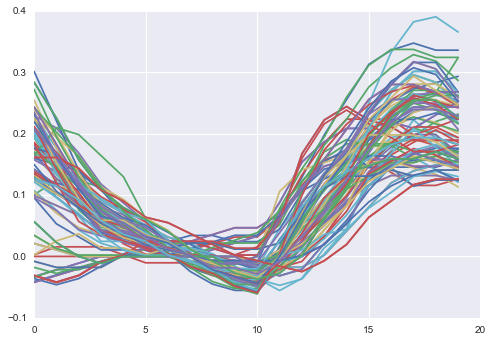

In [8]:
examples = series.filter(lambda x: x.std() > 6).normalize().sample(100).toarray()
plt.plot(series.index, examples.T);

We can compute statistics on series data; here we compute the fourier amplitude and phase and plot a phase histogram.

In [9]:
phases = series.filter(lambda x: x.std() > 6).flatten().fourier(freq=1)[:,1].toarray()

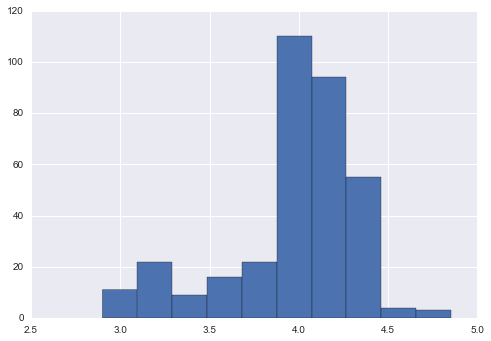

In [10]:
plt.hist(phases);

For this ``Series``, since the initial dimensions correspond to spatial coordinates, we can compute a statistic on each series, convert to a local array, and look at it as an image. Here, we compute the mean of each series.

In [11]:
statistic = series.map(lambda x: x.mean()).toarray()

In [12]:
statistic.shape

(76, 87, 2)

To look at this array as an image, we'll use a helper function from the `showit` package.

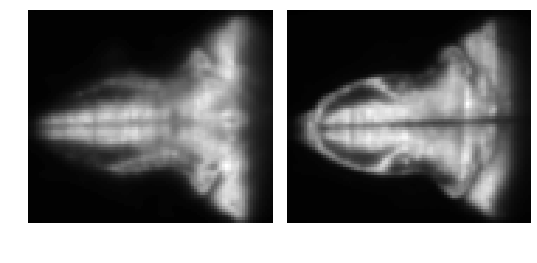

In [13]:
from showit import tile
tile(statistic, axis=2);

The other primary data type in Thunder is `images`. Here we'll load an example of these data.

In [14]:
images = td.images.fromexample('mouse')

In [15]:
images

Images
mode: local
dtype: int16
shape: (20, 64, 64)

An `Images` object is also a wrapper for an n-dimensional array, where the first dimension indexes the images, the remaining dimensions are the images (if 2d) or volumes (if 3d).

Although `images` is not an array, we can index into it as though it was one. We can also pass it to functions that expect arrays, like plotting functions, and it'll automatically be converted to one; above we explicitly converted to an array, but here we'll skip that. Let's look at the first image.

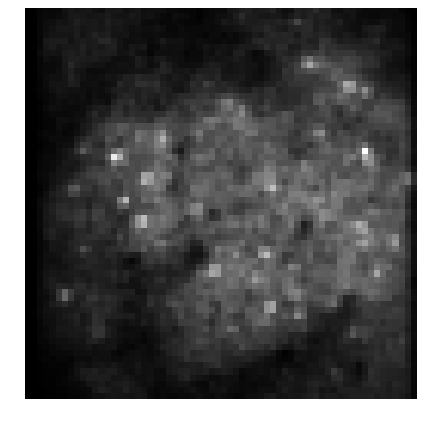

In [16]:
from showit import image
single = images[0, :, :]
image(single);

We can apply image filtering operations to image image. If data are distributed, this is a great way to apply filtering in parallel over a large data set. 

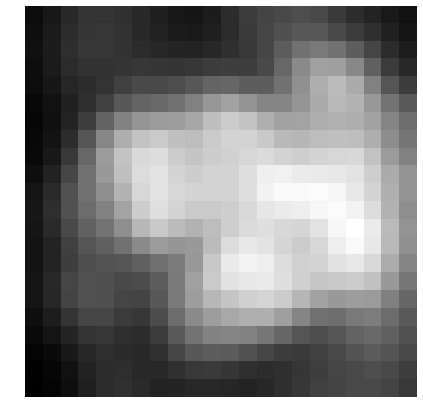

In [17]:
filtered = images.gaussian_filter(3).subsample(3)[0, :, :]
image(filtered);

Both `Images` and `Series` data can be provided as input to various other packages associated with `thunder`, including `thunder-registration`, `thunder-regression`, and `thunder-factorization`. See the other tutorials for more!